## **`EXPLORATORY DATA ANALYSIS (EDA)`**

**1. Importing Libraries**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

**2. Loading the Dataset**

In [5]:
dataset = pd.read_csv("/content/community_health_evaluation_dataset.csv")

In [6]:
dataset.head(5)

,Participant ID,Age,Gender,SES,Service Type,Visit Frequency,Step Frequency (steps/min),Stride Length (m),Joint Angle (°),EMG Activity,Patient Satisfaction (1-10),Quality of Life Score
0,1,56,F,4,Rehab,Weekly,85,0.54,17.99,Low,1,57
1,2,69,M,1,Preventive,Yearly,80,0.70,13.05,Moderate,8,94
2,3,46,M,4,Rehab,Yearly,81,0.57,29.85,Moderate,4,66
3,4,32,F,1,Consultation,Weekly,66,0.78,28.54,Moderate,9,66
4,5,60,M,3,Preventive,Weekly,73,0.84,20.80,High,5,98


**3. Checking the Dataset Information**

In [7]:
dataset.shape

(347, 12)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Participant ID               347 non-null    int64  
 1   Age                          347 non-null    int64  
 2   Gender                       347 non-null    object 
 3   SES                          347 non-null    int64  
 4   Service Type                 347 non-null    object 
 5   Visit Frequency              347 non-null    object 
 6   Step Frequency (steps/min)   347 non-null    int64  
 7   Stride Length (m)            347 non-null    float64
 8   Joint Angle (°)              347 non-null    float64
 9   EMG Activity                 347 non-null    object 
 10  Patient Satisfaction (1-10)  347 non-null    int64  
 11  Quality of Life Score        347 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 32.7+ KB


In [9]:
dataset.describe()

,Participant ID,Age,SES,Step Frequency (steps/min),Stride Length (m),Joint Angle (°),Patient Satisfaction (1-10),Quality of Life Score
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,174.000000,43.374640,2.357349,80.123919,0.751499,20.057378,5.213256,74.195965
std,100.314505,15.177304,1.129848,11.257582,0.143221,5.807653,2.833643,13.949400
min,1.000000,18.000000,1.000000,60.000000,0.500000,10.060000,1.000000,50.000000
25%,87.500000,31.000000,1.000000,71.000000,0.620000,15.065000,3.000000,62.000000
50%,174.000000,43.000000,2.000000,81.000000,0.760000,20.190000,5.000000,74.000000
75%,260.500000,56.000000,3.000000,90.000000,0.860000,25.220000,8.000000,86.000000
max,347.000000,69.000000,4.000000,99.000000,1.000000,29.970000,10.000000,99.000000


**4. Identifying Missing Data**

In [11]:
missing_data = dataset.isnull().sum()
missing_data[missing_data > 0]

,0


**6.Visualizing the Distributions**

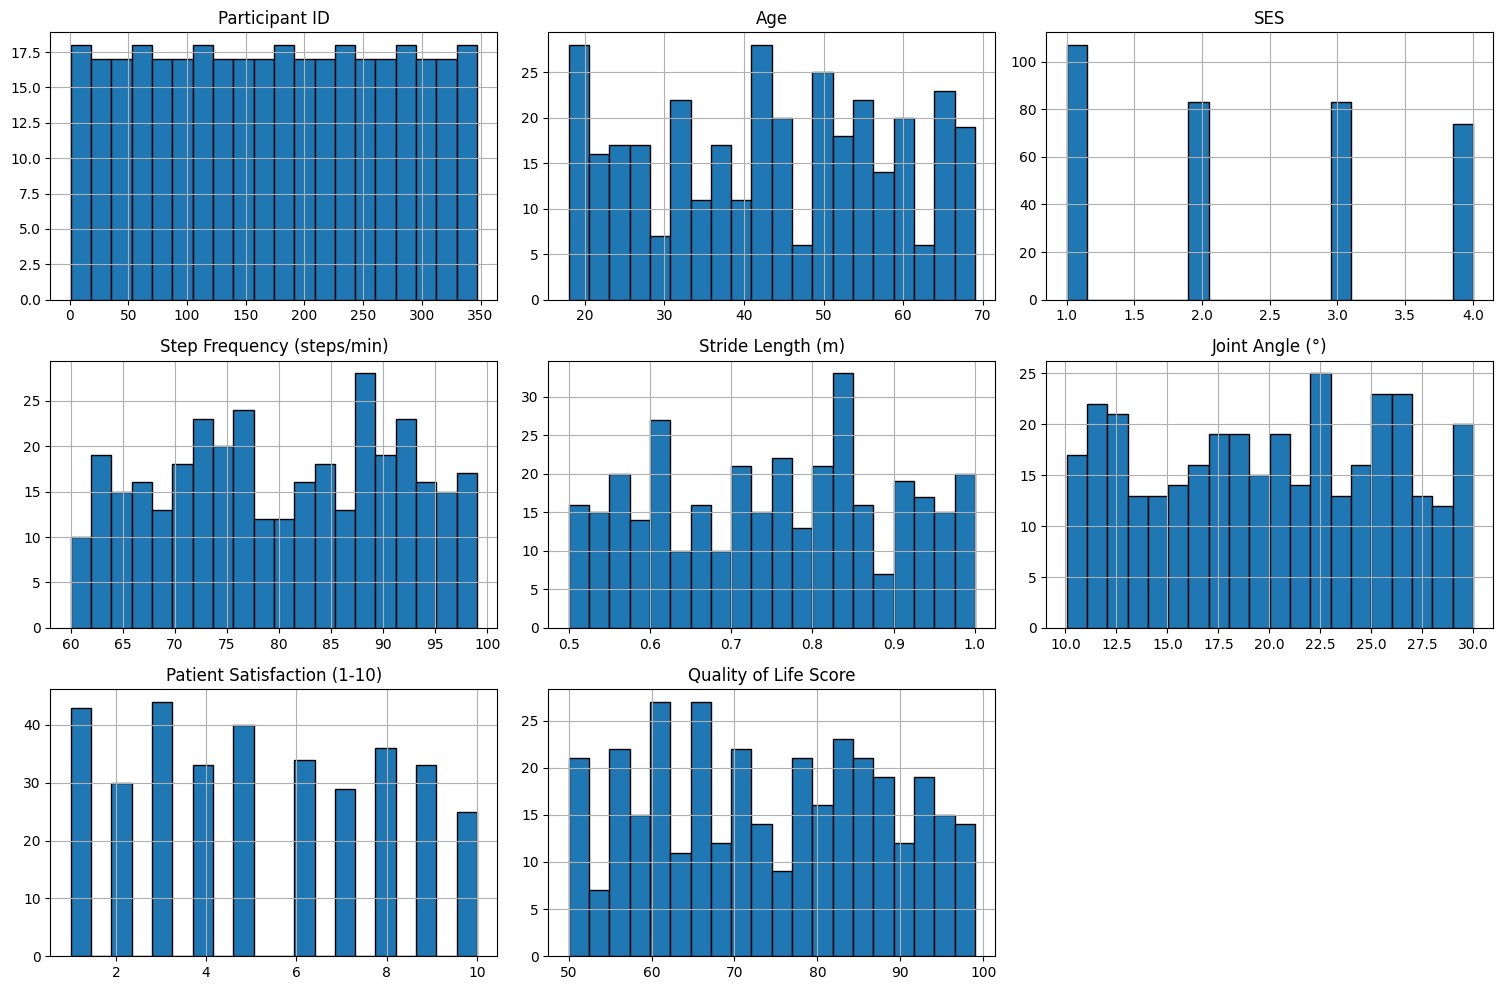

In [14]:
dataset.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

**6.Exploring Correlations**

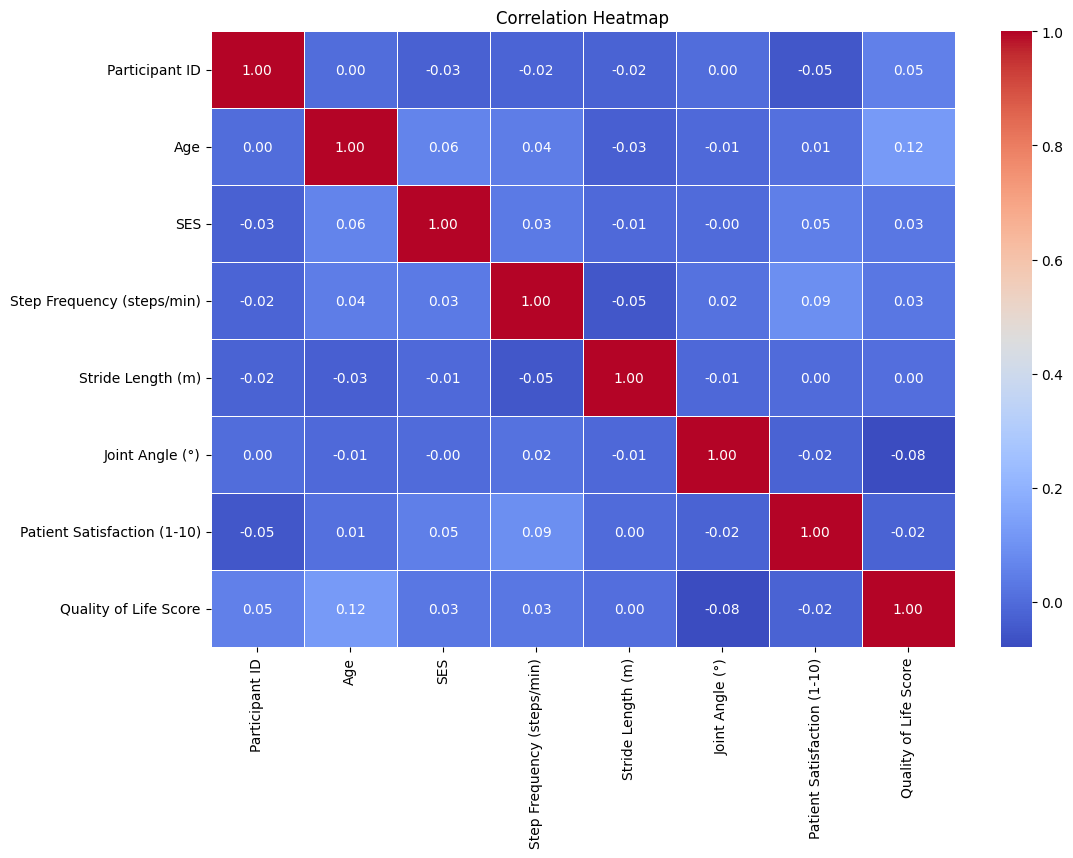

In [17]:
corr_matrix = dataset.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**7.Scatter Plots for Relationships**

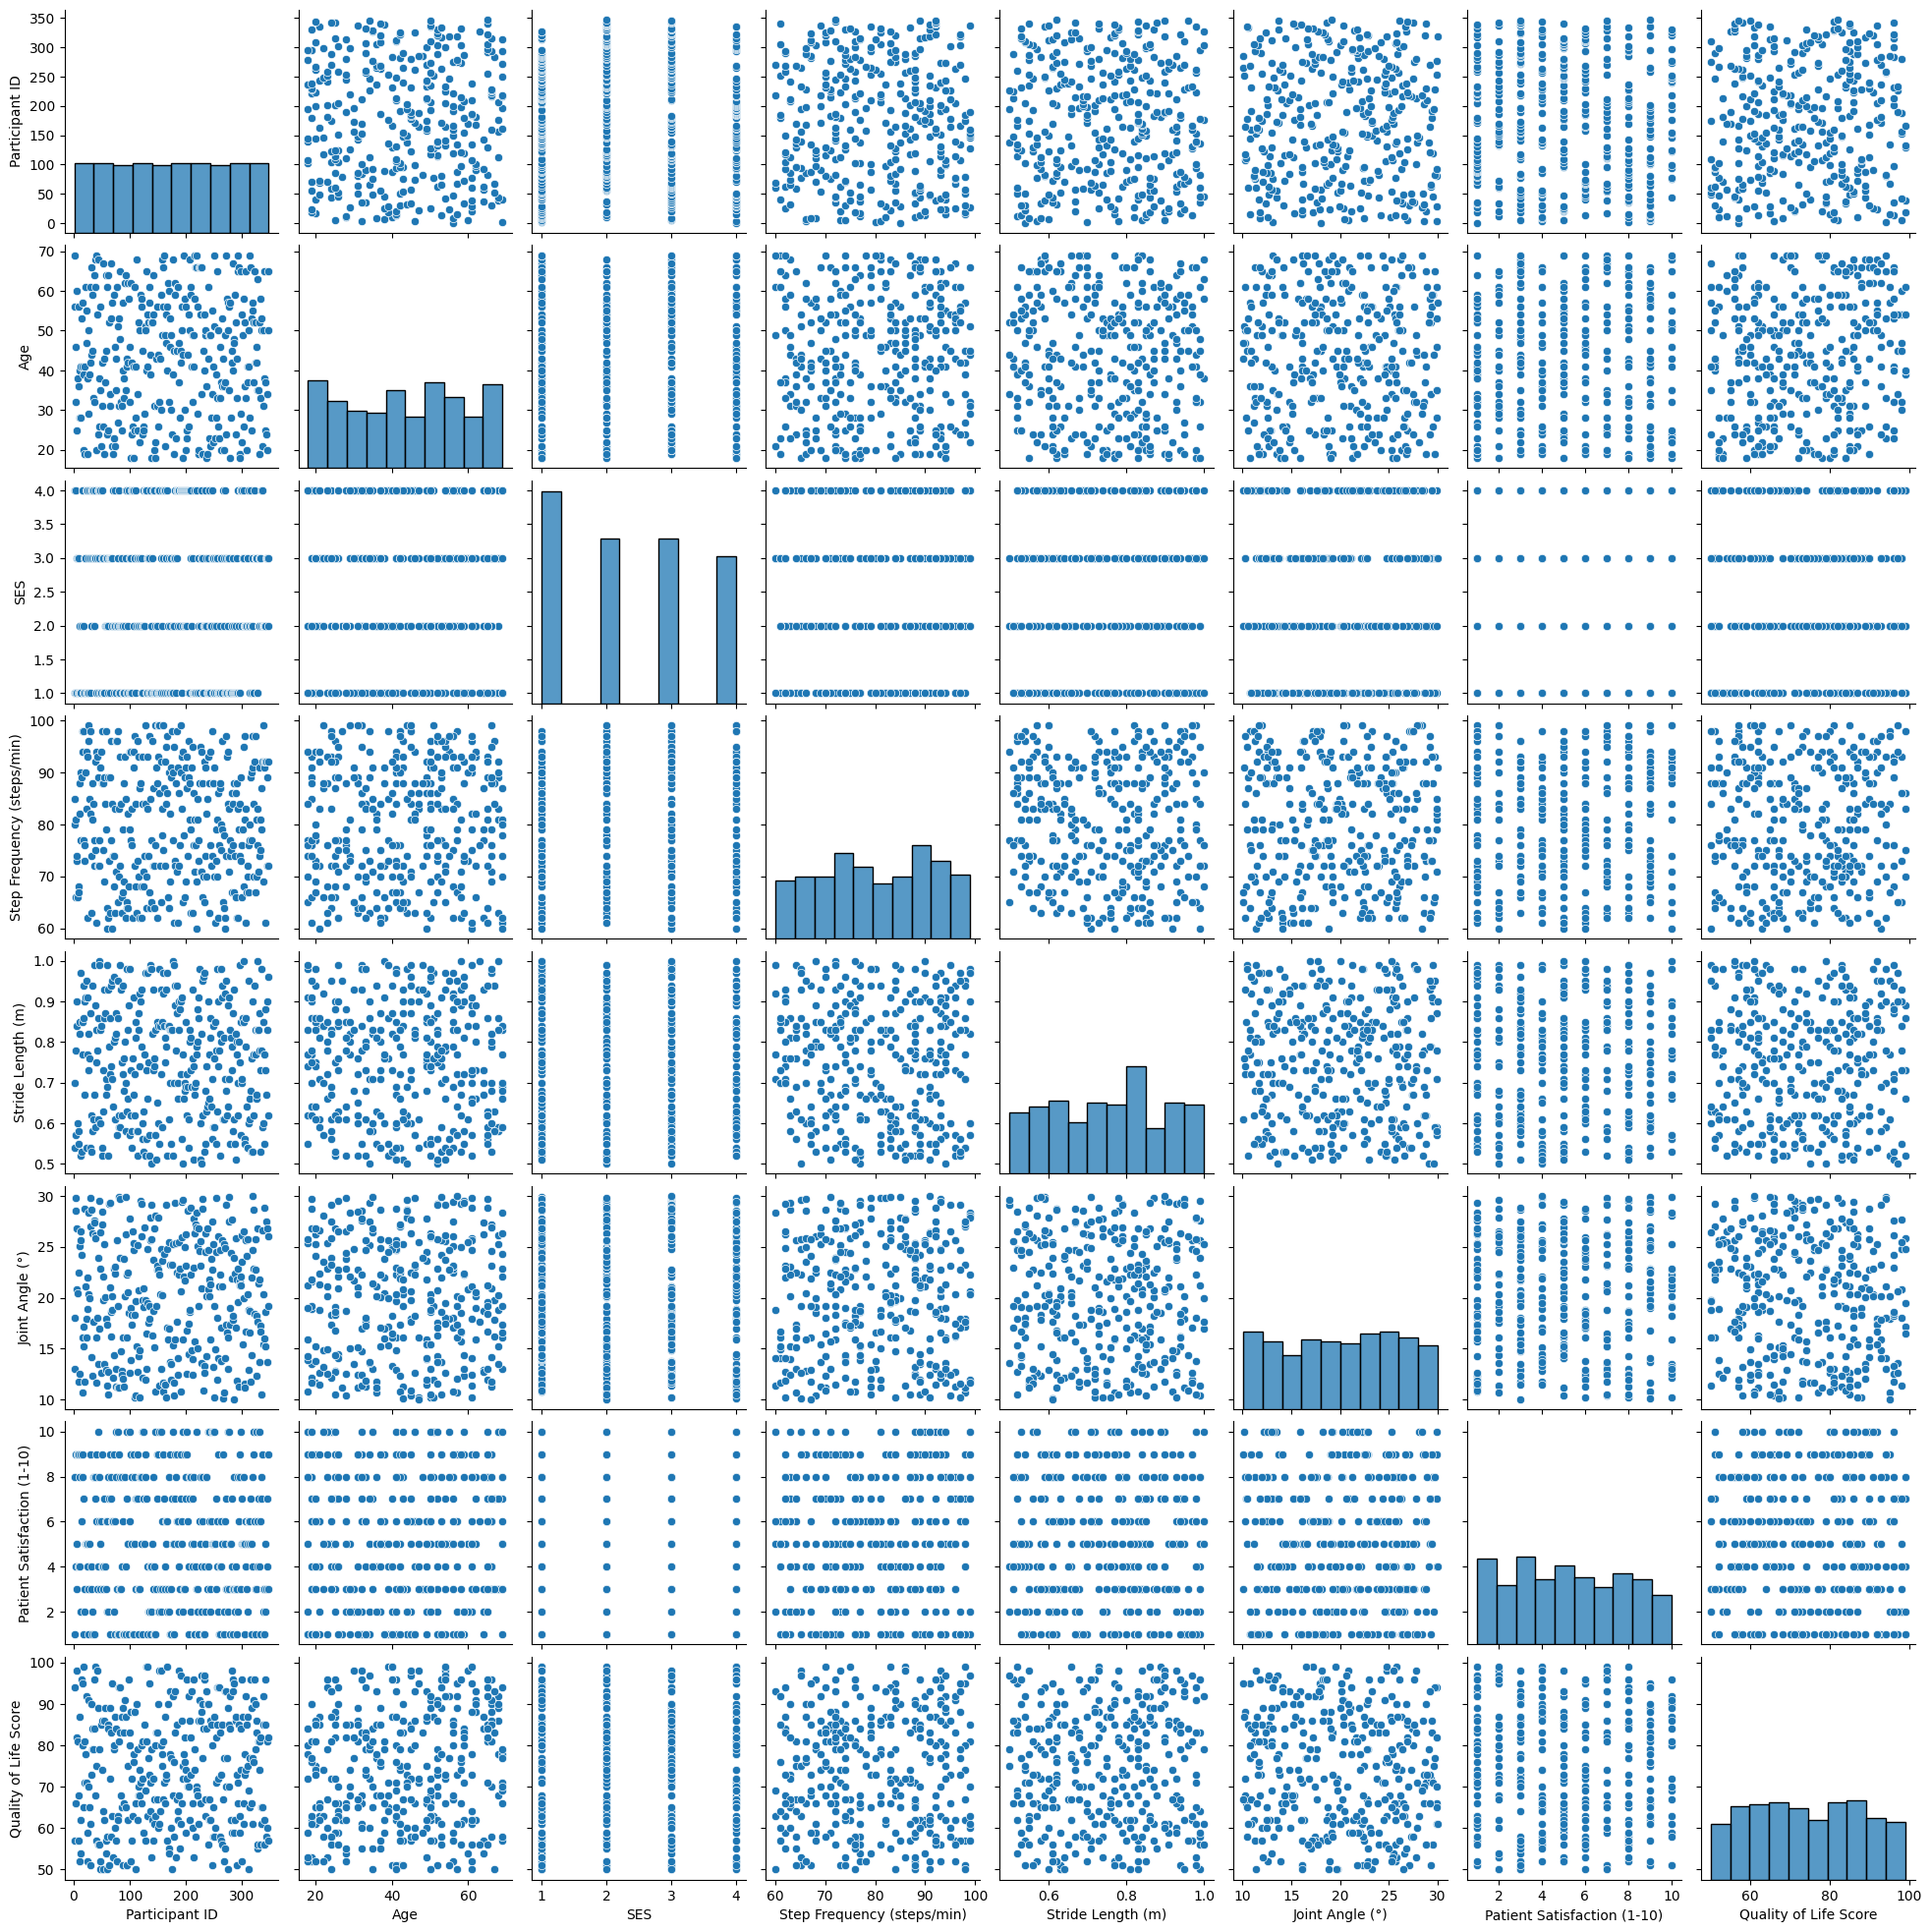

In [19]:
sns.pairplot(dataset, height=2.5)
plt.show()


**8.Checking for Outliers**

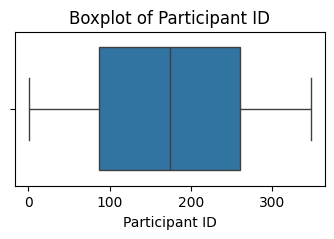

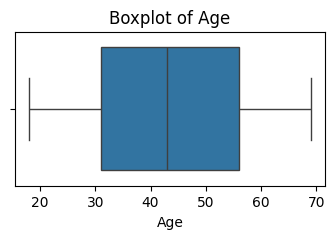

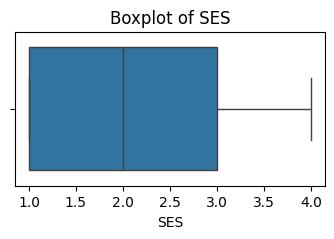

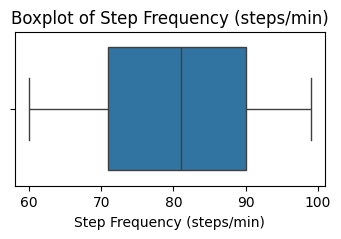

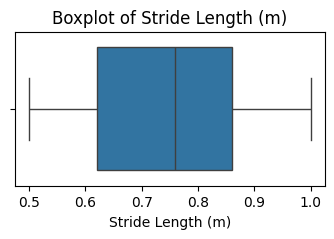

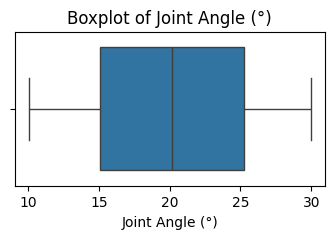

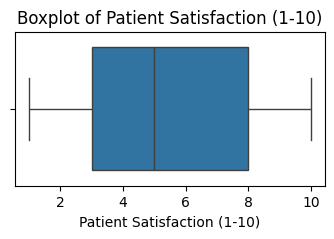

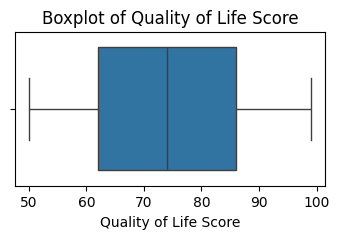

In [24]:
for col in numeric_columns:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=dataset[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


**9.Categorical Data Exploration**

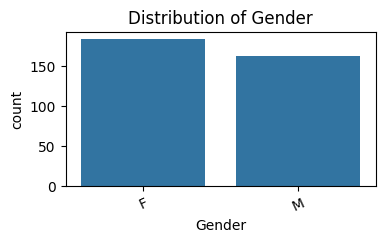

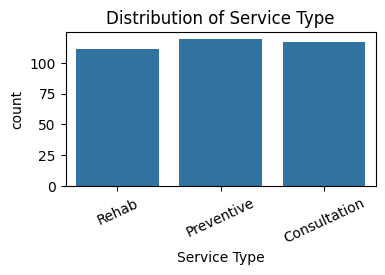

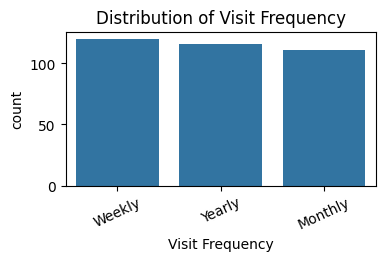

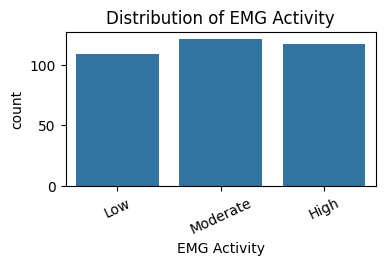

In [28]:
categorical_columns = dataset.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(4, 2))
    sns.countplot(x=dataset[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=25)
    plt.show()


**10.Handling Outliers**

In [32]:
actual_numerical_column = 'Age'  # Example: Assuming 'Age' is a numerical column in your dataset

Q1 = dataset[actual_numerical_column].quantile(0.25)
Q3 = dataset[actual_numerical_column].quantile(0.75)
IQR = Q3 - Q1

outliers = dataset[(dataset[actual_numerical_column] < (Q1 - 1.5 * IQR)) | (dataset[actual_numerical_column] > (Q3 + 1.5 * IQR))]
print(f"Outliers:\n{outliers}")

Outliers:
Empty DataFrame
Columns: [Participant ID, Age, Gender, SES, Service Type, Visit Frequency, Step Frequency (steps/min), Stride Length (m), Joint Angle (°), EMG Activity, Patient Satisfaction (1-10), Quality of Life Score]
Index: []
